In [1]:
import os 
import glob
from pathlib import Path
import pandas as pd 
import numpy as np 
import nibabel as nib 
import json


/working/lupolab/julia/anaconda/envs/pytnew/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


## We need to map the segmentations that are named by the T1 post contrast image to their corresponding patient: 

Begin by reading in the json file and data frames that describe what we just segmented: 

In [2]:
PATH = Path('/working/lupolab/julia/tcia_analysis/datasets/')

In [3]:
df = pd.read_csv(Path(PATH, 'one_exam_per_patient_with_fixed_vol.csv'))

In [4]:
with open(Path(PATH.parent,'nvidia', 'config', 'config_datalist_t1c.json'), 'r') as f: 
    segment_json = json.load(f)

In [5]:
segment_json

{'training': [],
 'validation': [{'image': 'TCGA-GBM-nifti/TCGA-06-0240/07-02-2005-04728/9-AxT1-thin_for_surgery-27598a.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-06-0143/02-11-2005-83875/11-COR__T1_POST_GD_FLAIR-28783a.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-06-0149/03-25-2003-87536/10-COR_T1_POST_GD_FLAIR-88922a.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-19-0955/04-07-2001-NR_MRI_BRAIN_WWO-83151/8-MRHG_T1_AX_POST_GAD-01973a.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-06-0648/01-20-2006-51419/11-AX_T1_POST_GD_FLAIR-02197a.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-12-0829/06-02-1999-BRAIN-09460/18-T1_AX_POST-73832a.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-06-0171/08-04-2001-68007/9-AX_T1_POST_GD_FLAIR-32350a.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-14-1401/04-18-1997-MRI_BRAIN_W_WOUT_CONTRAST-27628/1201-BRAIN_WWO_T1_POST-04167a.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-02-0033/05-26-1997-MRI_BRAIN_WWO_CONTR-89744/6-AX_T1_POST-51465a.nii.gz'},
  {'image': 'TCGA-GBM-nifti/TCGA-19

Now list all of the segmentations that are in our 'eval' folder: 

In [62]:
segmentations = [Path(x).stem for x in glob.glob(str(Path(PATH.parent, 'nvidia', 'eval_t1c', '*a'))) if x not in glob.glob(str(Path(PATH.parent, 'nvidia', 'eval_t1c', '*t1ca')))]

In [63]:
len(segmentations)

226

In [192]:
segmentations[:10]

['9-AxT1-thin_for_surgery-27598a',
 '11-COR__T1_POST_GD_FLAIR-28783a',
 '10-COR_T1_POST_GD_FLAIR-88922a',
 '8-MRHG_T1_AX_POST_GAD-01973a',
 '11-AX_T1_POST_GD_FLAIR-02197a',
 '18-T1_AX_POST-73832a',
 '9-AX_T1_POST_GD_FLAIR-32350a',
 '1201-BRAIN_WWO_T1_POST-04167a',
 '6-AX_T1_POST-51465a',
 '8-MP_RAGE_AXIAL-23748a']

In [64]:
df.head()

,patient_id,cohort,patient_exam,image,contrast,contrast_label,plane,exam_eligible,fixed_vol
0,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,9-AxT1-thin_for_surgery-27598,1,T1C,ax,1,4-AxFLAIR-thin_for_surgery-47036
1,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,21-nordicICE_HFH_-_rBF_map_-Leakage_corrected-...,1,rBF,cor,1,4-AxFLAIR-thin_for_surgery-47036
2,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,1-3_PLANE_LOC-22369,0,LOCALIZER,NaN,1,4-AxFLAIR-thin_for_surgery-47036
3,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,5-AXIAL_DIFFUSION-62807,0,DWI,ax,1,4-AxFLAIR-thin_for_surgery-47036
4,TCGA-06-0240,TCGA-GBM,07-02-2005-04728,8-AXIAL_PERFUSION-44568,1,PERFUSION,ax,1,4-AxFLAIR-thin_for_surgery-47036


In [65]:
df.shape

(3630, 9)

In [66]:
df_nodup = df.drop_duplicates(subset=['patient_id'])
df_nodup = df_nodup.drop(['image', 'contrast', 'contrast_label', 'plane', 'exam_eligible', 'fixed_vol'], axis = 1)

In [67]:
df_nodup.shape

(274, 3)

In [68]:
df_nodup = df_nodup.reset_index(drop = True)

In [69]:
df_nodup.head()

,patient_id,cohort,patient_exam
0,TCGA-06-0240,TCGA-GBM,07-02-2005-04728
1,TCGA-06-0143,TCGA-GBM,02-11-2005-83875
2,TCGA-06-0149,TCGA-GBM,03-25-2003-87536
3,TCGA-19-0955,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151
4,TCGA-06-0648,TCGA-GBM,01-20-2006-51419


In [70]:
seg_loc_root = Path(PATH.parent, 'nvidia', 'eval_t1c')

In [71]:
seg_list = [x['image'] for x in segment_json['validation']]

In [72]:
seg_list

['TCGA-GBM-nifti/TCGA-06-0240/07-02-2005-04728/9-AxT1-thin_for_surgery-27598a.nii.gz',
 'TCGA-GBM-nifti/TCGA-06-0143/02-11-2005-83875/11-COR__T1_POST_GD_FLAIR-28783a.nii.gz',
 'TCGA-GBM-nifti/TCGA-06-0149/03-25-2003-87536/10-COR_T1_POST_GD_FLAIR-88922a.nii.gz',
 'TCGA-GBM-nifti/TCGA-19-0955/04-07-2001-NR_MRI_BRAIN_WWO-83151/8-MRHG_T1_AX_POST_GAD-01973a.nii.gz',
 'TCGA-GBM-nifti/TCGA-06-0648/01-20-2006-51419/11-AX_T1_POST_GD_FLAIR-02197a.nii.gz',
 'TCGA-GBM-nifti/TCGA-12-0829/06-02-1999-BRAIN-09460/18-T1_AX_POST-73832a.nii.gz',
 'TCGA-GBM-nifti/TCGA-06-0171/08-04-2001-68007/9-AX_T1_POST_GD_FLAIR-32350a.nii.gz',
 'TCGA-GBM-nifti/TCGA-14-1401/04-18-1997-MRI_BRAIN_W_WOUT_CONTRAST-27628/1201-BRAIN_WWO_T1_POST-04167a.nii.gz',
 'TCGA-GBM-nifti/TCGA-02-0033/05-26-1997-MRI_BRAIN_WWO_CONTR-89744/6-AX_T1_POST-51465a.nii.gz',
 'TCGA-GBM-nifti/TCGA-19-1390/03-20-2001-NR_MRI_BRAIN_WWO-90326/8-MP_RAGE_AXIAL-23748a.nii.gz',
 'TCGA-GBM-nifti/TCGA-08-0356/03-26-2002-MSTEALTH-31923/7-AX_3D_SPGR_GAD-17095

In [73]:
attempted_segmentations = pd.DataFrame({'patient_id': [x.split('/')[1] for x in seg_list], 
                                        
             'seg_loc': [x.split('/')[3].split('.')[-3] for x in seg_list], 
             'seg_file': [ x.split('/')[3].split('.')[-3]+'_TC.nii.gz' for x in seg_list]})

In [74]:
actual_segmentations = pd.DataFrame(segmentations)

In [75]:
actual_segmentations.shape, attempted_segmentations.shape

((226, 1), (231, 3))

In [76]:
actual_segmentations.head()

,0
0,9-AxT1-thin_for_surgery-27598a
1,11-COR__T1_POST_GD_FLAIR-28783a
2,10-COR_T1_POST_GD_FLAIR-88922a
3,8-MRHG_T1_AX_POST_GAD-01973a
4,11-AX_T1_POST_GD_FLAIR-02197a


In [77]:
attempted_segmentations.head()

,patient_id,seg_loc,seg_file
0,TCGA-06-0240,9-AxT1-thin_for_surgery-27598a,9-AxT1-thin_for_surgery-27598a_TC.nii.gz
1,TCGA-06-0143,11-COR__T1_POST_GD_FLAIR-28783a,11-COR__T1_POST_GD_FLAIR-28783a_TC.nii.gz
2,TCGA-06-0149,10-COR_T1_POST_GD_FLAIR-88922a,10-COR_T1_POST_GD_FLAIR-88922a_TC.nii.gz
3,TCGA-19-0955,8-MRHG_T1_AX_POST_GAD-01973a,8-MRHG_T1_AX_POST_GAD-01973a_TC.nii.gz
4,TCGA-06-0648,11-AX_T1_POST_GD_FLAIR-02197a,11-AX_T1_POST_GD_FLAIR-02197a_TC.nii.gz


In [78]:
actual_seg_map = attempted_segmentations.loc[attempted_segmentations.seg_loc.isin(list(actual_segmentations[0]))]

In [79]:
actual_seg_map.shape

(226, 3)

In [80]:
actual_seg_map.head()

,patient_id,seg_loc,seg_file
0,TCGA-06-0240,9-AxT1-thin_for_surgery-27598a,9-AxT1-thin_for_surgery-27598a_TC.nii.gz
1,TCGA-06-0143,11-COR__T1_POST_GD_FLAIR-28783a,11-COR__T1_POST_GD_FLAIR-28783a_TC.nii.gz
2,TCGA-06-0149,10-COR_T1_POST_GD_FLAIR-88922a,10-COR_T1_POST_GD_FLAIR-88922a_TC.nii.gz
3,TCGA-19-0955,8-MRHG_T1_AX_POST_GAD-01973a,8-MRHG_T1_AX_POST_GAD-01973a_TC.nii.gz
4,TCGA-06-0648,11-AX_T1_POST_GD_FLAIR-02197a,11-AX_T1_POST_GD_FLAIR-02197a_TC.nii.gz


In [156]:
actual_seg_map['seg_file_shifted'] = [x[:-7]+'_shifted'+x[-7:] for x in actual_seg_map.seg_file]

/working/lupolab/julia/anaconda/envs/pytnew/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [162]:
actual_seg_map['seg_loc_shifted'] = [x+'_t1ca' for x in actual_seg_map.seg_loc]

/working/lupolab/julia/anaconda/envs/pytnew/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
actual_seg_map.head()

,patient_id,seg_loc,seg_file,seg_file_shifted,seg_loc_shifted
0,TCGA-06-0240,9-AxT1-thin_for_surgery-27598a,9-AxT1-thin_for_surgery-27598a_TC.nii.gz,9-AxT1-thin_for_surgery-27598a_TC_shifted.nii.gz,9-AxT1-thin_for_surgery-27598a_t1ca
1,TCGA-06-0143,11-COR__T1_POST_GD_FLAIR-28783a,11-COR__T1_POST_GD_FLAIR-28783a_TC.nii.gz,11-COR__T1_POST_GD_FLAIR-28783a_TC_shifted.nii.gz,11-COR__T1_POST_GD_FLAIR-28783a_t1ca
2,TCGA-06-0149,10-COR_T1_POST_GD_FLAIR-88922a,10-COR_T1_POST_GD_FLAIR-88922a_TC.nii.gz,10-COR_T1_POST_GD_FLAIR-88922a_TC_shifted.nii.gz,10-COR_T1_POST_GD_FLAIR-88922a_t1ca
3,TCGA-19-0955,8-MRHG_T1_AX_POST_GAD-01973a,8-MRHG_T1_AX_POST_GAD-01973a_TC.nii.gz,8-MRHG_T1_AX_POST_GAD-01973a_TC_shifted.nii.gz,8-MRHG_T1_AX_POST_GAD-01973a_t1ca
4,TCGA-06-0648,11-AX_T1_POST_GD_FLAIR-02197a,11-AX_T1_POST_GD_FLAIR-02197a_TC.nii.gz,11-AX_T1_POST_GD_FLAIR-02197a_TC_shifted.nii.gz,11-AX_T1_POST_GD_FLAIR-02197a_t1ca


In [164]:
actual_seg_map = actual_seg_map.drop(['seg_loc', 'seg_file'], axis = 1)
actual_seg_map.columns = ['patient_id', 'seg_file', 'seg_loc']

In [165]:
seg_df = pd.merge(actual_seg_map, df_nodup, how = 'left', on = 'patient_id')

In [166]:
seg_loc_root

PosixPath('/working/lupolab/julia/tcia_analysis/nvidia/eval_t1c')

In [167]:
seg_df['seg_loc'] = [str(Path(seg_loc_root, x)) for x in list(seg_df['seg_loc'])]

In [168]:
seg_df.head()

,patient_id,seg_file,seg_loc,cohort,patient_exam
0,TCGA-06-0240,9-AxT1-thin_for_surgery-27598a_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,07-02-2005-04728
1,TCGA-06-0143,11-COR__T1_POST_GD_FLAIR-28783a_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,02-11-2005-83875
2,TCGA-06-0149,10-COR_T1_POST_GD_FLAIR-88922a_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,03-25-2003-87536
3,TCGA-19-0955,8-MRHG_T1_AX_POST_GAD-01973a_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,04-07-2001-NR_MRI_BRAIN_WWO-83151
4,TCGA-06-0648,11-AX_T1_POST_GD_FLAIR-02197a_TC_shifted.nii.gz,/working/lupolab/julia/tcia_analysis/nvidia/ev...,TCGA-GBM,01-20-2006-51419


In [169]:
seg_df.to_csv(Path(PATH, 'segmentation_t1c_df.csv'), index = False)

In [170]:
os.listdir(PATH)

['.ipynb_checkpoints',
 'TCGA-GBM-nifti',
 'TCGA-LGG-nifti',
 'come_back_to',
 'manifest_files',
 'dicom_images_with_contrast.csv',
 'contrast_labels.csv',
 'contrast_labels_with_flair_eligibility.csv',
 'contrast_labels_with_eligibility.csv',
 'images_with_dicom_contrast.csv',
 'exam_counts.csv',
 'exam_counts.txt',
 'one_exam_per_patient_with_labels_flair.csv',
 'one_exam_per_patient_with_fixed_vol.csv',
 'one_exam_per_patient_with_labels.csv',
 'rename_script.sh',
 'segmentation_df.csv',
 'tcga_subtype_data.csv',
 'segmentation_fla_df.csv',
 'segmentation_t1c_df.csv']

## Now just quickly visually spot checking a few of the segmentations to see if they are correct: 

In [171]:
## Let's investigate just a few of them to ensure that they are correct: 
import nibabel as nib
import matplotlib.pyplot as plt

In [172]:
%matplotlib inline

### TCGA-06-0648



In [173]:
row = seg_df.iloc[4]
print(row['patient_id'])

TCGA-06-0648


In [174]:
seg_file = row['seg_file']

In [175]:
seg_file

'11-AX_T1_POST_GD_FLAIR-02197a_TC_shifted.nii.gz'

In [179]:
'_'.join(row['seg_file'].split("_")[:-2])

'11-AX_T1_POST_GD_FLAIR-02197a'

In [180]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-2])+'.nii.gz' ))


In [181]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)
t2all_vol.any()

True

In [182]:
fla_vol.shape[2]/2

67.5

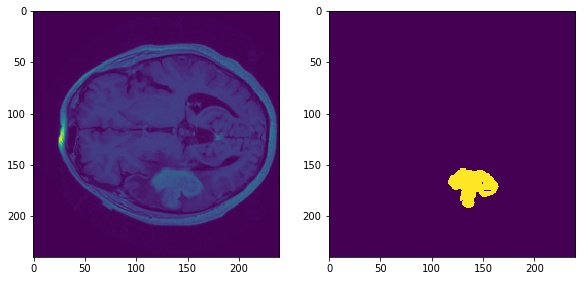

In [183]:
x = 68
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])

### TCGA-06-0171



In [184]:
row = seg_df.iloc[6]
print(row['patient_id'])

TCGA-06-0171


In [185]:
seg_file = row['seg_file']

In [186]:
seg_file

'9-AX_T1_POST_GD_FLAIR-32350a_TC_shifted.nii.gz'

In [187]:
'_'.join(row['seg_file'].split("_")[:-1])

'9-AX_T1_POST_GD_FLAIR-32350a_TC'

In [188]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-2])+'.nii.gz' ))


In [189]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)
t2all_vol.any()

True

In [190]:
t2all_vol.sum(axis = (0, 1)).argmax()

96

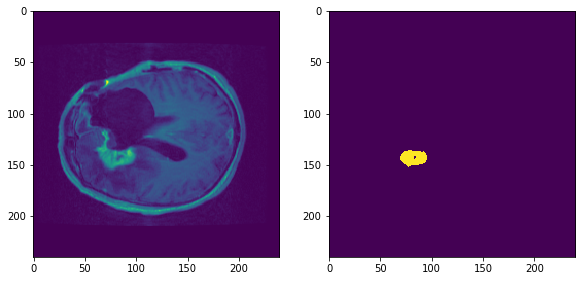

In [191]:
x = 96
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])

### TCGA-06-0143



In [114]:
row = seg_df.iloc[1]
print(row['patient_id'])

TCGA-06-0143


In [115]:
seg_file = row['seg_file']

In [116]:
seg_file

'11-COR__T1_POST_GD_FLAIR-28783a_TC.nii.gz'

In [117]:
'_'.join(row['seg_file'].split("_")[:-1])

'11-COR__T1_POST_GD_FLAIR-28783a'

In [118]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-1])+'.nii.gz' ))


In [119]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)
t2all_vol.any()

True

In [120]:
t2all_vol.sum(axis = (0, 1)).argmax()

100

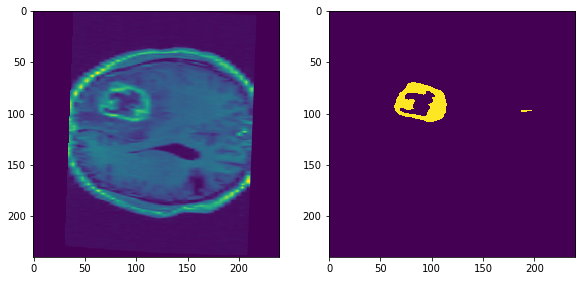

In [121]:
x = 100
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])

### TCGA-06-0240

In [122]:
row = seg_df.iloc[0]
print(row['patient_id'])

TCGA-06-0240


In [152]:
seg_df.seg_loc[0]

'/working/lupolab/julia/tcia_analysis/nvidia/eval_t1c/9-AxT1-thin_for_surgery-27598a'

In [124]:
PATH

PosixPath('/working/lupolab/julia/tcia_analysis/datasets')

In [125]:
seg_file = row['seg_file']

In [126]:
'_'.join(row['seg_file'].split("_")[:-1])

'9-AxT1-thin_for_surgery-27598a'

In [127]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-1])+'.nii.gz' ))


In [128]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)


In [129]:
t2all_vol.sum(axis = (0, 1)).argmax()

94

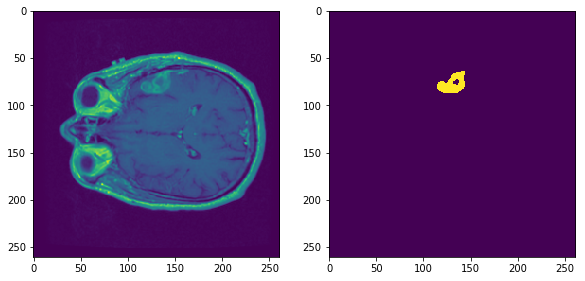

In [131]:
x =t2all_vol.sum(axis = (0, 1)).argmax()
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])

### TCGA-DU-7309



In [132]:
row = seg_df.iloc[-1]
print(row['patient_id'])

TCGA-DU-7309


In [133]:
seg_file = row['seg_file']

In [134]:
'_'.join(row['seg_file'].split("_")[:-1])

'12-AX_T1_POST_GD_FLAIR-75778a'

In [135]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-1])+'.nii.gz' ))


In [136]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)


In [137]:
t2all_vol.any()

True

In [140]:
t2all_vol.sum()

96

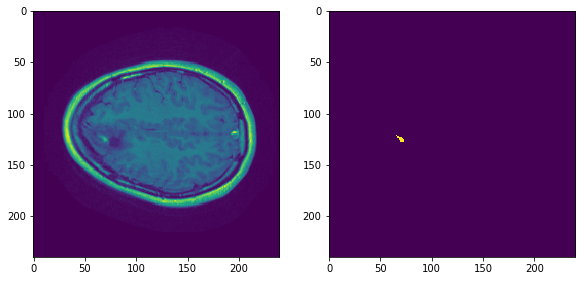

In [139]:
x = t2all_vol.sum(axis = (0, 1)).argmax()
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])

### TCGA-DU-A6S6

In [141]:
row = seg_df.iloc[-2]
print(row['patient_id'])

TCGA-DU-A6S6


In [142]:
seg_file = row['seg_file']

In [143]:
'_'.join(row['seg_file'].split("_")[:-1])

'9-COR_T1_POST_GD-46070a'

In [144]:
t2all_vol = nib.load(Path(row['seg_loc'],row['seg_file']))
fla_vol = nib.load(Path(PATH, row['cohort']+'-nifti', row['patient_id'], row['patient_exam'], '_'.join(row['seg_file'].split("_")[:-1])+'.nii.gz' ))


In [145]:
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)


In [146]:
fla_vol.shape[2]/2
t2all_vol.any()

False

In [148]:
t2all_vol.sum(axis = (0, 1)).argmax()

0

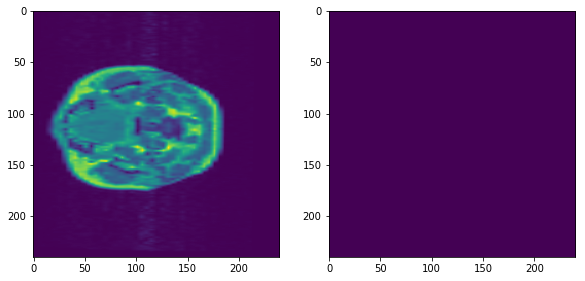

In [147]:
x = t2all_vol.sum(axis = (0, 1)).argmax()
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(fla_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(t2all_vol[:,:,x])

# I want to 